<a href="https://colab.research.google.com/github/shomerthesec/AutoEncoder-for-Chest-X-ray/blob/main/autoencoder_for_chest_x_ray_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
t_df=pd.read_csv('../input/vinbigdata-chest-xray-3ch-jpg/vinbigdata/train.csv')
test_df=pd.read_csv('../input/vinbigdata-chest-xray-3ch-jpg/vinbigdata/test.csv')
t_df.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,2954,3159
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2080,2336
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,2304,2880
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,2540,3072


In [ ]:
t_df['image_id'][0]

'50a418190bc3fb1ef1633bf9678929b3'

In [ ]:
t_df['image_id']=t_df['image_id']+'.png'

In [ ]:
t_df

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3.png,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9.png,No finding,14,R7,NaN,NaN,NaN,NaN,2954,3159
2,9a5094b2563a1ef3ff50dc5c7ff71345.png,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2080,2336
3,051132a778e61a86eb147c7c6f564dfe.png,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,2304,2880
4,063319de25ce7edb9b1c6b8881290140.png,No finding,14,R10,NaN,NaN,NaN,NaN,2540,3072
...,...,...,...,...,...,...,...,...,...,...
67909,936fd5cff1c058d39817a08f58b72cae.png,No finding,14,R1,NaN,NaN,NaN,NaN,2444,3200
67910,ca7e72954550eeb610fe22bf0244b7fa.png,No finding,14,R1,NaN,NaN,NaN,NaN,1994,2430
67911,aa17d5312a0fb4a2939436abca7f9579.png,No finding,14,R8,NaN,NaN,NaN,NaN,2048,2500
67912,4b56bc6d22b192f075f13231419dfcc8.png,Cardiomegaly,3,R8,771.0,979.0,1680.0,1311.0,1968,2040


In [ ]:
t_df.fillna(value=0,
            axis=1,
            inplace=True)
t_df.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3.png,No finding,14,R11,0.0,0.0,0.0,0.0,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9.png,No finding,14,R7,0.0,0.0,0.0,0.0,2954,3159
2,9a5094b2563a1ef3ff50dc5c7ff71345.png,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2080,2336
3,051132a778e61a86eb147c7c6f564dfe.png,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,2304,2880
4,063319de25ce7edb9b1c6b8881290140.png,No finding,14,R10,0.0,0.0,0.0,0.0,2540,3072


In [ ]:
# making the x y normalized of the images
ws=['x_min','x_max']
hs=['y_min','y_max']
for w in ws:
    t_df[w]=t_df[w]/t_df['width']
for h in hs:
    t_df[h]=t_df[h]/t_df['height']   

t_df.head()    

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3.png,No finding,14,R11,0.000000,0.000000,0.000000,0.000000,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9.png,No finding,14,R7,0.000000,0.000000,0.000000,0.000000,2954,3159
2,9a5094b2563a1ef3ff50dc5c7ff71345.png,Cardiomegaly,3,R10,0.332212,0.588613,0.794712,0.783818,2080,2336
3,051132a778e61a86eb147c7c6f564dfe.png,Aortic enlargement,0,R10,0.548611,0.257986,0.699219,0.353819,2304,2880
4,063319de25ce7edb9b1c6b8881290140.png,No finding,14,R10,0.000000,0.000000,0.000000,0.000000,2540,3072


In [ ]:
# change the no findings to normal
t_df['class_name']= t_df['class_name'].map(lambda x: 'Normal' if x=='No finding' else x)
t_df.head()


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3.png,Normal,14,R11,0.000000,0.000000,0.000000,0.000000,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9.png,Normal,14,R7,0.000000,0.000000,0.000000,0.000000,2954,3159
2,9a5094b2563a1ef3ff50dc5c7ff71345.png,Cardiomegaly,3,R10,0.332212,0.588613,0.794712,0.783818,2080,2336
3,051132a778e61a86eb147c7c6f564dfe.png,Aortic enlargement,0,R10,0.548611,0.257986,0.699219,0.353819,2304,2880
4,063319de25ce7edb9b1c6b8881290140.png,Normal,14,R10,0.000000,0.000000,0.000000,0.000000,2540,3072


In [ ]:
# # no need to tinker with the class names
# idx2class={ idx : c for idx,c in zip( t_df['class_id'].unique() ,t_df['class_name'].unique() )}
# idx2class

In [ ]:
# classes=idx2class.values()
# classes

In [ ]:
t_df.drop(columns=['width','height','rad_id'],inplace=True)
t_df.head()

,image_id,class_name,class_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3.png,Normal,14,0.000000,0.000000,0.000000,0.000000
1,21a10246a5ec7af151081d0cd6d65dc9.png,Normal,14,0.000000,0.000000,0.000000,0.000000
2,9a5094b2563a1ef3ff50dc5c7ff71345.png,Cardiomegaly,3,0.332212,0.588613,0.794712,0.783818
3,051132a778e61a86eb147c7c6f564dfe.png,Aortic enlargement,0,0.548611,0.257986,0.699219,0.353819
4,063319de25ce7edb9b1c6b8881290140.png,Normal,14,0.000000,0.000000,0.000000,0.000000


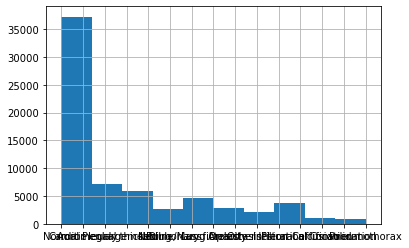

In [ ]:
t_df['class_name'].hist()

In [ ]:
# creating a mask to limit/cap the num of samples in each class to 2000
from collections import Counter
mask=[]
tmp_l=[]
for l in t_df['class_name']:
    tmp_l.append(l)
    c=Counter(tmp_l)
    if c[l] < 2000:
        mask.append(1)
    else:
        mask.append(0)
mask

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
np.sum(mask)

22259

In [ ]:
len(mask)

67914

great now we have our mask to apply to our data


In [ ]:
mask=[bool(m) for m in mask]
len(mask)

67914

In [ ]:
t_df=t_df[mask]

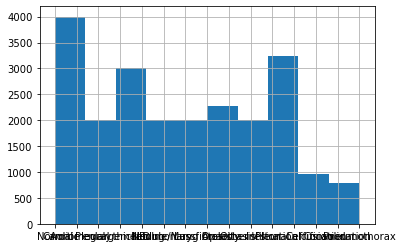

In [ ]:
t_df['class_name'].hist()

In [ ]:
Counter( t_df['class_name'] )

Counter({'Normal': 1999,
         'Cardiomegaly': 1999,
         'Aortic enlargement': 1999,
         'Pleural thickening': 1999,
         'ILD': 1000,
         'Nodule/Mass': 1999,
         'Pulmonary fibrosis': 1999,
         'Lung Opacity': 1999,
         'Atelectasis': 279,
         'Other lesion': 1999,
         'Infiltration': 1247,
         'Pleural effusion': 1999,
         'Calcification': 960,
         'Consolidation': 556,
         'Pneumothorax': 226})

In [ ]:
# # Lets try making them capped at 300 only?
# from collections import Counter
# mask=[]
# tmp_l=[]
# for l in t_df['class_name']:
#     tmp_l.append(l)
#     c=Counter(tmp_l)
#     if c[l] < 200:
#         mask.append(1)
#     else:
#         mask.append(0)
# mask=[bool(m) for m in mask]
# t_df= t_df[mask]


In [ ]:
# t_df['class_name'].count()

In [ ]:
# Counter( t_df['class_name'] )

In [ ]:
# diseases={}
# for l in t_df['class_name'].unique() :
#     #print(l)
#     diseases= 

In [ ]:
t_df= pd.concat([t_df['image_id'] ,t_df['class_name'] , pd.get_dummies( t_df['class_name'] , dtype= np.float32 )] , axis=1 ) 


In [ ]:
t_df.head()

,image_id,class_name,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,Nodule/Mass,Normal,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis
0,50a418190bc3fb1ef1633bf9678929b3.png,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,21a10246a5ec7af151081d0cd6d65dc9.png,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,9a5094b2563a1ef3ff50dc5c7ff71345.png,Cardiomegaly,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,051132a778e61a86eb147c7c6f564dfe.png,Aortic enlargement,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,063319de25ce7edb9b1c6b8881290140.png,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#[i for i in t_df.iloc[:,1:]]
#list(t_df.iloc[:,1:].values[2][-1])

In [ ]:
# t_df['class_vec']= [ i[-1] for i in t_df.iloc[:,1:].values ]
# t_df.head()

In [ ]:
# t_df['class_vec']= [tf.convert_to_tensor( i , np.float32) for i in  t_df['class_vec']  ]


In [ ]:
classes= t_df['class_name'].unique()
classes

array(['Normal', 'Cardiomegaly', 'Aortic enlargement',
       'Pleural thickening', 'ILD', 'Nodule/Mass', 'Pulmonary fibrosis',
       'Lung Opacity', 'Atelectasis', 'Other lesion', 'Infiltration',
       'Pleural effusion', 'Calcification', 'Consolidation',
       'Pneumothorax'], dtype=object)

In [ ]:
# for visualization purposes
import tensorflow_datasets as tfds
def display_samples():
    
    def display_one_row(disp_images, offset, shape=(224, 224,3)):
      '''Display sample outputs in one row.'''
      for idx, test_image in enumerate(disp_images):
        plt.subplot(3, 10, offset + idx + 1)
        plt.xticks([])
        plt.yticks([])
        test_image = np.reshape(test_image, shape)
        plt.imshow(test_image, cmap='gray')


    def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(224,224,3)):
      '''Displays the input, encoded, and decoded output values.'''
      plt.figure(figsize=(15, 5))
      display_one_row(disp_input_images, 0, shape=(224,224,3))
      display_one_row(disp_encoded, 10, shape=(28, 28))
      display_one_row(disp_predicted, 20, shape=(224,224,3))


    # take 1 batch of the dataset
    test_dataset = val_data.next()

    # take the input images and put them in a list
    output_samples = []
    input_image, image = test_dataset
    output_samples = input_image

    import numpy as np
    import matplotlib.pyplot as plt

    # pick 10 indices
    idxs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

    # prepare test samples as a batch of 10 images
    conv_output_samples = np.array(output_samples[idxs])
    #conv_output_samples = np.reshape(conv_output_samples, (10, 224, 224, 3))
    # get the encoder ouput
    encoded = encoder_model.predict(conv_output_samples)

    # get a prediction for some values in the dataset
    predicted = ED_model.predict(conv_output_samples)

    # display the samples, encodings and decoded values!
    display_results(conv_output_samples, encoded, predicted, enc_shape=(224,224,3))

In [ ]:
t_gen= tf.keras.preprocessing.image.ImageDataGenerator( featurewise_center=False,
                                                        samplewise_center=True,
                                                        featurewise_std_normalization=False,
                                                        samplewise_std_normalization=True,
                                                        zca_whitening=False,
                                                        zca_epsilon=1e-06,
                                                        rotation_range=0.1,
                                                        width_shift_range=0.1,
                                                        height_shift_range=0.1,
                                                        brightness_range=None,
                                                        shear_range=0.1,
                                                        zoom_range=0.1,
                                                        channel_shift_range=0.0,
                                                        fill_mode='nearest',
                                                        cval=0.0,
                                                        horizontal_flip=True,
                                                        vertical_flip=False,
                                                        validation_split=0.1,
                                                        rescale=1/255)

test_gen= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [ ]:
train_data= t_gen.flow_from_dataframe(  t_df,
                                        directory='../input/vinbigdata-chest-xray-3ch-jpg/vinbigdata/train',
                                        x_col='image_id',
                                        y_col='class_name',
                                        target_size=(224, 224),
                                        color_mode='rgb',
                                        class_mode="input" ,
                                        batch_size=128,
                                        shuffle=True,
                                        interpolation='nearest',)

val_data= t_gen.flow_from_dataframe(t_df,
                                    directory='../input/vinbigdata-chest-xray-3ch-jpg/vinbigdata/train',
                                    x_col='image_id',
                                    y_col='class_name',
                                    target_size=(224, 224),
                                    color_mode='rgb',
                                    class_mode="input",
                                    batch_size=128,
                                    shuffle=False,
                                    subset='validation',
                                    interpolation='nearest',
                                    validate_filenames=True)

Found 22259 validated image filenames.
Found 2225 validated image filenames.


In [ ]:
# suggested layers to use. feel free to add or remove as you see fit.
from keras.layers import Conv2D, UpSampling2D , MaxPooling2D , Input

# use the Sequential API (you can remove if you want to use the Functional API)
#model = Sequential()

### START CODE HERE ###
# use `model.add()` to add layers (if using the Sequential API)

def autoencoder_builder():
   inputs=Input( shape=(224, 224, 3) )
   # encoder
   conv1=Conv2D(32 , 3 ,padding='same',activation='relu' )(inputs)
   conv2=Conv2D(64 , 3 ,padding='same',activation='relu')(conv1)
   pool1=MaxPooling2D()(conv2)
   conv3=Conv2D(128 , 3 ,padding='same',activation='relu')(pool1)
   conv4=Conv2D(256 , 3 ,padding='same',activation='relu')(conv3)
   pool2=MaxPooling2D()(conv4)
   conv5=Conv2D(512 , 3 ,padding='same',activation='relu')(pool2)
   pool3=MaxPooling2D()(conv5)
    # bottle neck
   bottle_neck=Conv2D(1024 , 3 ,padding='same',activation='relu')(pool3)

   encoder_visualization = tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), activation='relu', padding='same')(bottle_neck)
   encoder= tf.keras.Model(inputs=inputs , outputs=encoder_visualization)
    
    # decoder
   conv_5=Conv2D(512 , 3 ,padding='same',activation='relu')(bottle_neck) 
   up3= UpSampling2D()(conv_5)
   conv_4=Conv2D(256 , 3 ,padding='same',activation='relu')(up3)
   conv_3=Conv2D(128 , 3 ,padding='same',activation='relu')(conv_4)
   up2= UpSampling2D()(conv_3)
   conv_2=Conv2D(64 , 3 ,padding='same',activation='relu')(up2)
   conv_1=Conv2D(32 , 3 ,padding='same',activation='relu')(conv_2)
   up1=UpSampling2D()(conv_1)
   output=Conv2D(3 , 3 ,padding='same',activation='sigmoid') (up1)

   return tf.keras.Model(inputs=inputs , outputs=output) , encoder

### END CODE HERE ###
ED_model , encoder_model= autoencoder_builder()

In [ ]:
encoder_model.summary()

Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 224, 224, 64)      18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 112, 112, 256)     295168    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 56, 56, 256)     

In [ ]:
ED_model.summary()

Model: "functional_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 224, 224, 64)      18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 112, 112, 256)     295168    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 56, 56, 256)     

In [ ]:
import tensorflow.keras.backend as K
# BECAUSE mse doesn't work with generators well
import keras.losses
keras.losses.custom_loss = r_loss
def r_loss(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred), axis = [1,2,3])

LEARNING_RATE = 0.0005
optimizer = tf.keras.optimizers.Adam(lr = LEARNING_RATE)

In [ ]:
# Please do not change the model.compile() parameters
ED_model.compile(optimizer=optimizer , metrics=['mse'], loss=r_loss)

In [ ]:

### START CODE HERE ###
ED_model.fit(train_data ,epochs=2) # epochs=40

Epoch 1/2
174/174 [==============================] - 402s 2s/step - loss: 0.6189 - mean_squared_error: 0.6189
Epoch 2/2
174/174 [==============================] - 405s 2s/step - loss: 0.6188 - mean_squared_error: 0.6188


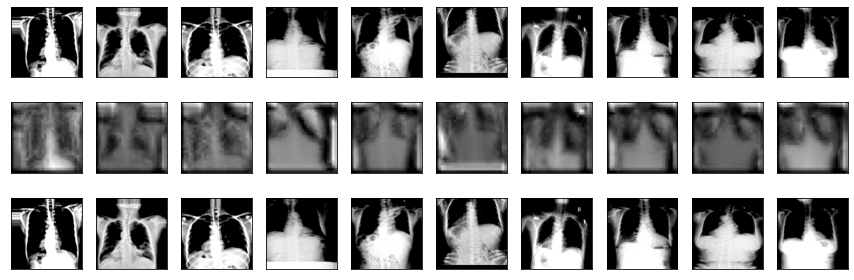

In [ ]:
display_samples()

In [ ]:
ED_model.save('ED_model.h5')
encoder_model.save('encoder_model.h5')

In [ ]:
# need to specify the custom loss function as custom object to load the loss
ED_model=tf.keras.models.load_model('ED_model.h5', custom_objects={'r_loss': r_loss})


In [ ]:
ED_model.summary()

Model: "functional_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 224, 224, 64)      18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 112, 112, 256)     295168    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 56, 56, 256)     

In [ ]:
encoder=tf.keras.models.load_model('encoder_model.h5')
encoder.summary()